In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import matplotlib.pyplot as plt
import sys
import os

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Config

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Spectractor config 

In [5]:
PATH_SPECTRACTOR='../../Spectractor'

In [6]:
infile='test/reduc_20170531_074_spectrum.fits'

In [7]:
infile_fullpath=os.path.join(PATH_SPECTRACTOR,infile)

In [8]:
sys.path.append(PATH_SPECTRACTOR)

In [9]:
from spectractor import *

# Read file

Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd111980_stis_001.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd111980_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd111980_stis_003.fits


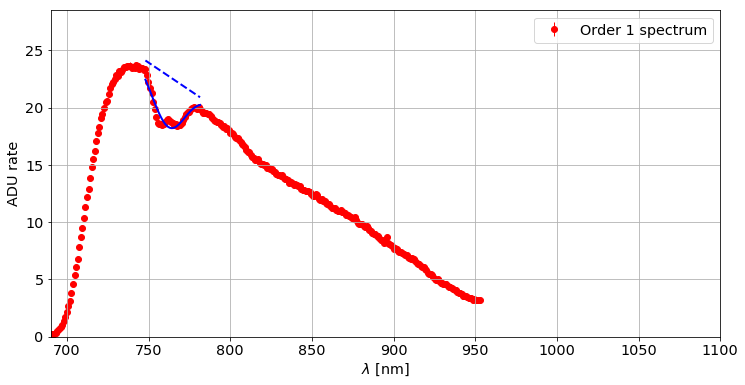

In [10]:


s = Spectrum(infile_fullpath)
s.plot_spectrum() 

In [11]:
from astropy.io import fits

In [12]:
hdul = fits.open(infile_fullpath)

In [13]:
hdul.info()

Filename: ../../Spectractor/test/reduc_20170531_074_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     140   (292, 3)   float64   


In [14]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  292                                                  
NAXIS2  =                    3                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD111980'           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170601.030908' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

In [15]:
image_data = hdul[0].data

In [16]:
image_data.shape

(3, 292)

In [17]:
wl=image_data[0,:]
spec=image_data[1,:]
err=image_data[2,:]

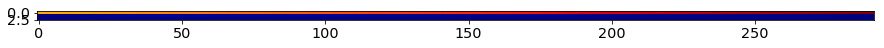

In [18]:
plt.imshow(image_data, cmap='jet')
#plt.colorbar()

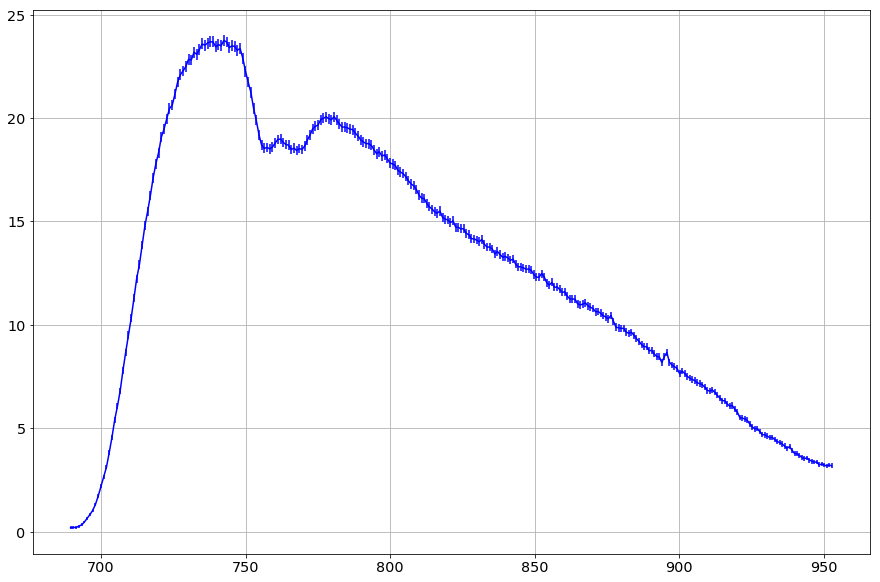

In [19]:
plt.errorbar(wl,spec,yerr=err,color='blue')
plt.grid()